In [11]:
# Notebook setup
import nengo                                # neural network simulation library
import numpy as np                          # a scientific computing library
from matplotlib import pyplot as plt        # a plotting library
plt.rcParams['axes.labelsize'] = 20         # set default plot axes label font size
plt.rcParams['axes.titlesize'] = 24         # set default plot title font size
plt.rcParams['legend.fontsize'] = 18        # set default plot legend font size
# make plots inline in the notebook instead of creating a new window

from nengo.utils.ensemble import tuning_curves
from numpy.linalg import svd
%matplotlib inline



# Bonus Problem

In this problem we will employ more sophisticated mathematical tools to understand the decoding process. Every matrix ${\bf A} \in \mathbb{R}^{\text{m} \times \text{n}}$ has a *singular value decomposition*: 

$$ {\bf A} = {\bf U}{\bf \Sigma} {\bf V}^{\rm T}$$

where ${\bf U} \in \mathbb{R}^{\text{m} \times \text{m}}$ and ${\bf V}\in \mathbb{R}^{\text{n} \times \text{n}}$ are orthogonal matrices, and ${\bf \Sigma}$ is a diagonal matrix stacked on top of (m-n) rows of zeros (assuming that m > n). It is useful to note that the columns of ${\bf U}$ are an orthonormal basis for $\mathbb{R}^m$ and the columns of ${\bf V}$ are an orthonormal basis for $\mathbb{R}^n$. It is also useful to consider a different (but equivalent) way of expressing the SVD of ${\bf A}$:

$${\bf A} = \sum_{i = 1}^{n} \sigma_i {\bf u}_i {\bf v}_i^{\rm T}$$

where the ${\bf u}_i$ and ${\bf v}_i$ are columns of ${\bf U}$ and ${\bf V}$, called the left and right *singular vectors*, respectively, and the $\sigma_i$ are the associated *singular values*, such that 

$$ {\bf A}{\bf v}_i = \sigma_i {\bf u}_i $$


Note that you can compute the SVD of a matrix ${\bf A}$ using the numpy function "np.linalg.svd(A)".

Building finished in 0:00:01.                                                   


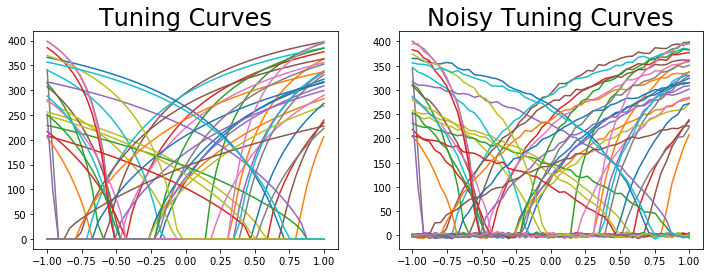

In [28]:
model = nengo.Network()
with model:
    ens_1d = nengo.Ensemble(500, dimensions=1)
with nengo.Simulator(model) as sim:
    eval_points, A = tuning_curves(ens_1d, sim)

sig = 2.5
Ahat = A + np.random.normal(size = A.shape)*sig
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].set_title("Tuning Curves")
ax[0].plot(eval_points, A[:, ::10]);
ax[1].set_title("Noisy Tuning Curves")
ax[1].plot(eval_points, Ahat[:, ::10]);

# 4.0
Using numpy's SVD function, compute the SVD of the tuning curve matrix $A$ (generated above). On three separate figures, plot
1. The first 50 singular values $\sigma_i$ of ${\bf A}$ (use a log scale for the y-axis with plt.semilogy)
2. The first 5 left singular vectors $u_i$ of ${\bf A}$
3. The first 5 Right singular vectors $v_i$ of ${\bf A}$

Next, compute the SVD of the noisy tuning curve matrix $\widehat{{{\bf A}}}$ (generated above). On three separate figures, plot
1. The first 50 singular values $\sigma_i$ of $\widehat{{\bf A}}$ (use a log scale for the y-axis with plt.semilogy)
2. The first 5 left singular vectors $u_i$ of $\widehat{{\bf A}}$
3. The first 5 right singular vectors $v_i$ of $\widehat{{\bf A}}$

Finally, on a separate figure, plot the relative error 
$$ r = \frac{\left|\sigma_i ({\bf A}) - \sigma_i (\widehat{{\bf A}})\right|}{ \sigma_i ({\bf A}) }$$
between the first 50 singular values of ${\bf A}$ and the first 50 singular values of $\widehat{{\bf A}}$.

Comment on what you see.

## 4.1
Derive an expression for the solution to the least squares decoding problem

${\bf d}_\ast = \underset{{\bf d}}{\text{minimize}}\; \| {\bf A}{\bf d} - {\bf f} \|^2$

in terms of the left and right singular vectors of ${\bf A}$, the singular values of ${\bf A}$ and the function ${\bf f}$, sampled at the same values of $x$ and expressed as a column vector. 

## 4.2

Using your solution to 4.1, give a simple expression for the solution to the least squares decoding problem when the target function is $u_i$ (one of the left singular vectors of $A$). Specifically, derive an expression for

${\bf d}_{\ast, i} = \underset{{\bf d}}{\text{minimize}}\; \| {\bf A}{\bf d} - {\bf u}_i \|^2$


## 4.3

In 4.0, you explored the effect of noise on the singular values $\sigma_i$ of $A$. Given this observation and your answer to 4.2, how much error do you expect when decoding $u_i$ from the noisy tuning curves (i.e., $\widehat{{\bf A}}$) as a function of $i$? What is the general trend? Back up your answer by measuring the decoding error empirically and plotting it as a function of $i$. Specifically, for each $i$, compute the error

$$ E = \| \widehat{{\bf A}}{\bf d}_{\ast, i} - {\bf u}_i \|^2 $$

Can you derive an analytical expression for this error?


## 4.4

Building off of your answer to 4.3, predict which types of functions you can decode most accurately (in the presence of noise) from the tuning curve matrix ${\bf A}$. Can you give a procedure that will allow you to estimate roughly how accurately you can decode a given function ${\bf f}$ from a fixed tuning curve matrix ${\bf A}$?
